# Loading data and libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [4]:
data_path = 'data/features.csv'
data = pd.read_csv(data_path)


In [5]:
data = data.drop('image_name', axis=1)
data.head()

,emotion,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,anger,-1.428322,-2.749566,-2.032341,-2.475148,-0.624892,1.583270,0.126194,-3.698842,-2.724081,...,3.858866,-0.125929,1.335275,-1.440515,2.700578,4.101924,0.121701,0.524948,2.028014,1.614662
1,anger,-0.723825,-1.192947,-1.236288,-1.458866,-0.642059,1.538294,-0.016959,-3.608485,-3.166990,...,5.340909,1.654338,1.511577,-1.423252,2.868817,3.430298,0.540194,0.397613,1.440959,2.179935
2,anger,-2.055435,-2.489880,-1.404612,-1.285668,-0.559901,0.969242,0.140930,-3.207069,-2.032331,...,4.012209,0.864038,0.979044,-2.196960,1.869865,3.020842,-0.400805,-0.377998,1.283908,1.741546
3,anger,-2.224430,-2.016579,-2.168460,-1.955911,-0.959196,1.185008,0.468653,-3.397077,-2.489948,...,3.693282,-0.357024,0.794611,-2.715299,1.846426,2.493282,-0.778155,-0.134014,1.675935,2.004439
4,anger,-2.522418,-2.703371,-0.968167,-1.032310,0.321314,2.480530,1.605173,-2.882027,-1.731589,...,3.092202,-0.069652,0.765910,-0.646848,1.292196,2.855774,-0.462175,0.661697,0.881518,3.086551


# Preprocessing 

In [6]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1312)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


## Constructing the pipeline

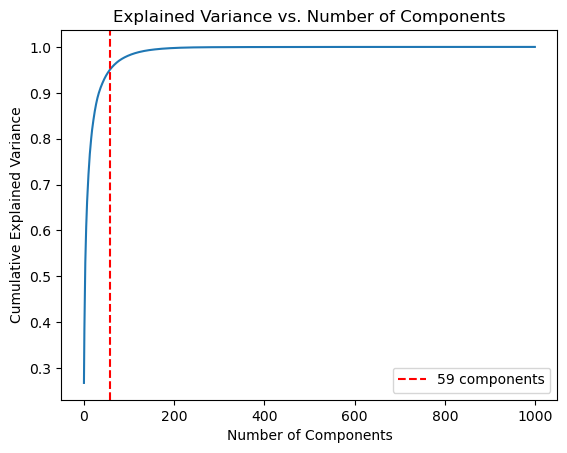

Number of components needed to explain 95% of the variance: 59


In [9]:
pca = PCA().fit(X_train)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

plt.plot(cumulative_explained_variance)
plt.axvline(x=n_components_95 - 1, color='r', linestyle='--', label=f'{n_components_95} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.show()

print(f'Number of components needed to explain 95% of the variance: {n_components_95}')

In [10]:
class CustomPCA(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        
        return self

    def transform(self, X, n):
        pca = X.select_dtypes(include=['number']).columns
        pca = PCA(n_components = n)
        pca.fit(X)

        X = pca.transform(X)
        X = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(n)])
        
        return X

In [11]:
preprocesser =  Pipeline(
    [ 
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components = n_components_95))

    ]
)

In [12]:
preprocesser.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=59))])

## Running the pipeline

In [13]:
X_train = preprocesser.transform(X_train)

# Convert back to DataFrame
columns = [f'PC{i+1}' for i in range(n_components_95)]
X_train = pd.DataFrame(X_train, columns=columns)


In [14]:
X_train.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59
count,1.603600e+04,16036.000000,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,...,1.603600e+04,1.603600e+04,1.603600e+04,16036.000000,1.603600e+04,1.603600e+04,1.603600e+04,1.603600e+04,16036.000000,1.603600e+04
mean,2.835790e-17,0.000000,-2.481317e-17,4.696778e-17,-1.417895e-17,5.671581e-17,7.089476e-18,-4.962633e-17,7.089476e-18,2.126843e-17,...,-8.861845e-18,-1.772369e-18,-3.013027e-17,0.000000,-1.085576e-17,-2.392698e-17,-3.101646e-18,-1.772369e-17,0.000000,-1.063421e-17
std,1.460355e+01,10.511684,8.644343e+00,8.326319e+00,6.721371e+00,6.417609e+00,5.575594e+00,5.510659e+00,4.858861e+00,4.694278e+00,...,1.428980e+00,1.409946e+00,1.391594e+00,1.361933,1.351606e+00,1.312844e+00,1.298039e+00,1.280676e+00,1.262841,1.230000e+00
min,-3.585946e+01,-32.138756,-3.522743e+01,-3.080222e+01,-2.832782e+01,-2.379712e+01,-2.144779e+01,-1.928567e+01,-1.819848e+01,-1.750701e+01,...,-6.271085e+00,-6.407755e+00,-4.875227e+00,-5.363677,-5.654344e+00,-5.701201e+00,-5.442495e+00,-5.086207e+00,-5.740775,-5.539354e+00
25%,-1.081693e+01,-7.678563,-5.790027e+00,-5.714786e+00,-4.529966e+00,-4.483954e+00,-3.663735e+00,-3.715465e+00,-3.297136e+00,-3.222828e+00,...,-9.362961e-01,-9.328871e-01,-9.266230e-01,-0.908555,-8.961418e-01,-8.783968e-01,-8.707326e-01,-8.556031e-01,-0.839035,-8.247725e-01
50%,-2.590022e+00,-0.176598,4.053012e-03,-4.672358e-01,-1.604176e-01,-1.424348e-01,3.815990e-02,-1.212727e-01,-3.872186e-02,7.267315e-02,...,1.744101e-03,4.900947e-03,1.232532e-03,-0.017806,1.247516e-02,1.235594e-02,-1.288651e-03,1.986710e-03,-0.015510,-3.232298e-02
75%,9.365149e+00,7.366559,5.781186e+00,5.194416e+00,4.306471e+00,4.217303e+00,3.716256e+00,3.476795e+00,3.196287e+00,3.233856e+00,...,9.530673e-01,9.421530e-01,9.196949e-01,0.909466,8.981735e-01,8.829577e-01,8.608236e-01,8.630545e-01,0.823992,8.134979e-01
max,4.799096e+01,32.499365,3.653131e+01,3.826678e+01,3.009242e+01,3.605417e+01,2.227382e+01,2.419661e+01,2.272035e+01,1.903995e+01,...,6.844293e+00,6.487929e+00,5.221525e+00,6.074138,5.864527e+00,6.372501e+00,5.691384e+00,5.909527e+00,6.232563,6.142735e+00


In [15]:
X_test = preprocesser.transform(X_test)

# Convert back to DataFrame
columns = [f'PC{i+1}' for i in range(n_components_95)]
X_test = pd.DataFrame(X_test, columns=columns)


In [16]:
# If you need to save the PCA-transformed data to a CSV file
# pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
# pca_df.to_csv('pca_transformed_data_2.csv', index=False)
# print("PCA-transformed data saved to 'pca_transformed_data.csv'")

# Training

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [19]:
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [20]:
def print_performance(y, y_hat):
    print("\nOVERALL PERFORAMNCE\n")
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(classification_report(y, y_hat))
    cm = confusion_matrix(y, y_hat)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

## QuadraticDiscriminantAnalysis

### No optimizaiton

In [21]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()


OVERALL PERFORAMNCE

Accuracy: 0.36927106067219556
              precision    recall  f1-score   support

       anger       0.34      0.24      0.28       895
    contempt       0.32      0.49      0.39       760
     disgust       0.28      0.18      0.22       686
        fear       0.30      0.34      0.32       835
       happy       0.55      0.68      0.61       932
     neutral       0.37      0.48      0.42       892
         sad       0.32      0.18      0.24       892
    surprise       0.36      0.32      0.34       981

    accuracy                           0.37      6873
   macro avg       0.36      0.36      0.35      6873
weighted avg       0.36      0.37      0.36      6873



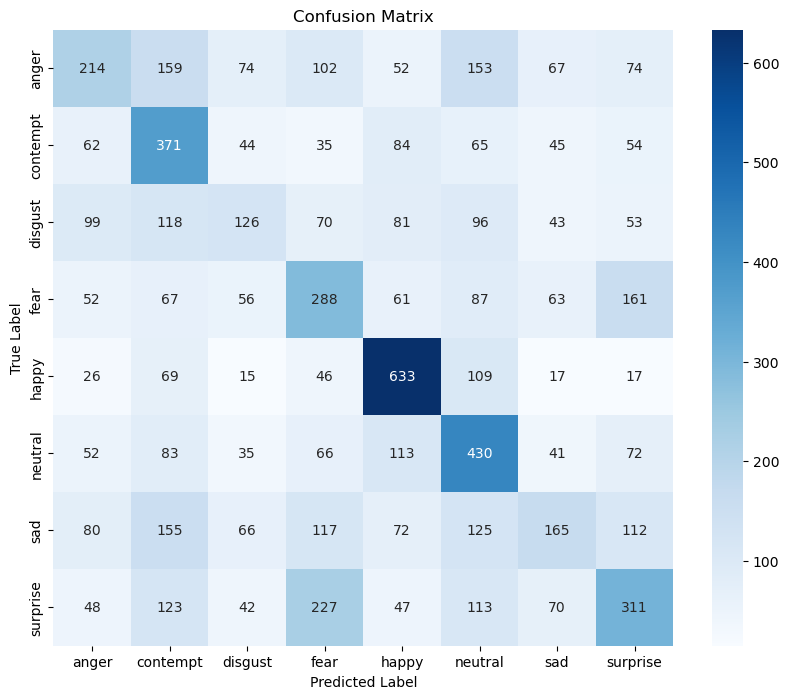

In [22]:
y_pred = model.predict(X_test)
print_performance(y_test, y_pred)

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


OVERALL PERFORAMNCE

Accuracy: 0.34322712061690674
              precision    recall  f1-score   support

       anger       0.30      0.30      0.30       895
    contempt       0.34      0.38      0.36       760
     disgust       0.29      0.10      0.15       686
        fear       0.32      0.29      0.30       835
       happy       0.46      0.66      0.54       932
     neutral       0.36      0.40      0.38       892
         sad       0.26      0.13      0.18       892
    surprise       0.30      0.41      0.34       981

    accuracy                           0.34      6873
   macro avg       0.33      0.33      0.32      6873
weighted avg       0.33      0.34      0.33      6873



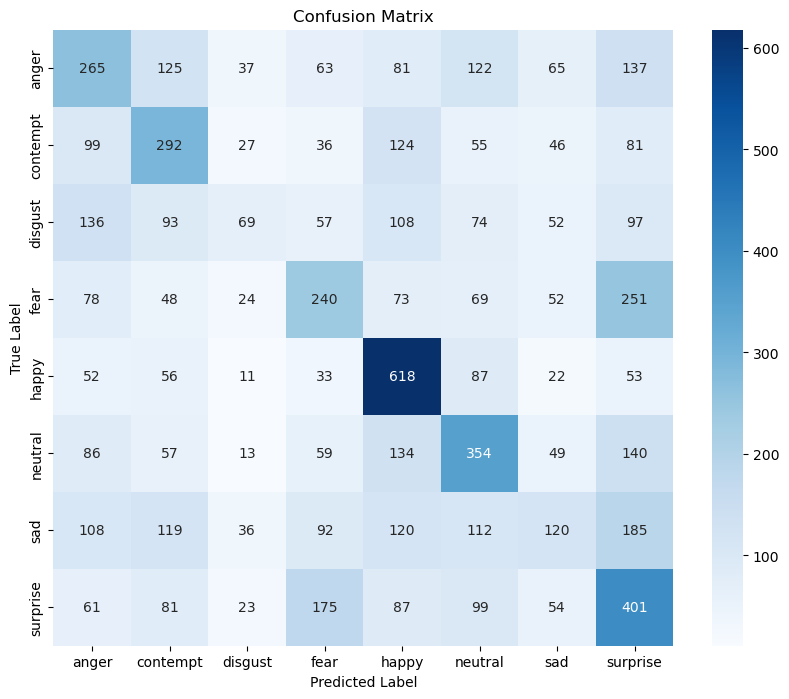

In [44]:
y_pred = model.predict(X_test)
print_performance(y_test, y_pred)

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
k_params = [3, 5, 7, 9,12,15,21, 27]


In [64]:
knn_params = {'n_neighbors': k_params}  #vrednosti parametara koje treba probati
grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, scoring='accuracy')
grid.fit(X_train,y_train)

print('Best param: ', grid.best_params_)

Best param:  {'n_neighbors': 21}


In [70]:
model = KNeighborsClassifier(n_neighbors = 21)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)


OVERALL PERFORAMNCE

Accuracy: 0.3336243270769678
              precision    recall  f1-score   support

       anger       0.30      0.27      0.29       895
    contempt       0.28      0.45      0.34       760
     disgust       0.25      0.14      0.18       686
        fear       0.31      0.34      0.32       835
       happy       0.48      0.64      0.55       932
     neutral       0.34      0.44      0.38       892
         sad       0.26      0.12      0.17       892
    surprise       0.32      0.24      0.27       981

    accuracy                           0.33      6873
   macro avg       0.32      0.33      0.31      6873
weighted avg       0.32      0.33      0.32      6873



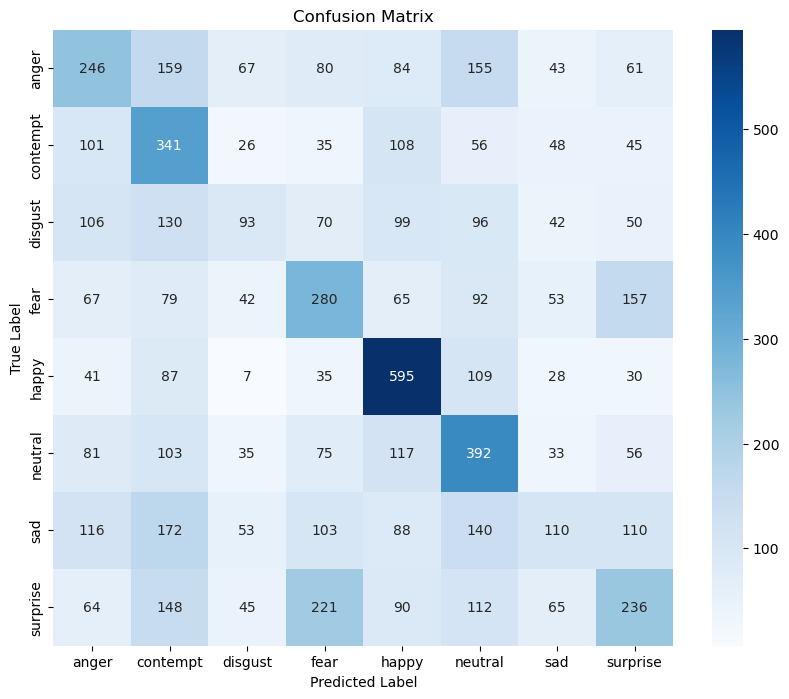

In [71]:
y_pred = model.predict(X_test)
print_performance(y_test, y_pred)

# Comparison

Performances (accuracy):
- QDA: 0.37
- Random Forest: 0.34
- KNN: 0.33